In [34]:
import numpy as np
import pandas as pd
import plotly.express as px

# Lithium

In [35]:
# Load data source #1 - Lithium prices in USD per kilogram
df1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Lithium_prices_2017-01-01_to_2021-12-31_merged.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Price'] = df1['Price'].astype(float)
df1 = df1.drop(columns=['Unit'])
df1.head()

,Date,Price
0,2017-05-10,20.92
1,2017-05-11,20.92
2,2017-05-12,20.92
3,2017-05-15,20.92
4,2017-05-16,20.92


In [36]:
# Load data source #2 - South America LOB
df2 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/lithium_SouthAmerica_LOB_2017m.csv', sep=';')
df2.head()
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Price'] = df2['Price'].astype(float)
df2['Price'] = df2['Price']/1000 # WARNING: DIVIDING BY 1000
df2.head()

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_17934/2186703837.py:4: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Date,Price
0,2016-12-31,10.00
1,2017-01-31,10.00
2,2017-02-28,10.25
3,2017-03-31,10.25
4,2017-04-30,10.50


In [37]:
# Load data source #3 - COMEX Lithium Hydroxide future
df3 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/COMEX Lithium Hydroxide CIF CJK (Fastmarkets) Electronic Commodity Future Continuation 1.csv', sep=';')
df3 = df3.rename(columns={'Exchange Date': 'Date'})
df3 = df3.rename(columns={'Close' : 'Price'})
df3['Date'] = pd.to_datetime(df3['Date'], format='%d-%b-%Y')
df3 = df3.iloc[:, :4] # Keep only the first 4 columns
df3.head()

,Date,Price,Net,%Chg
0,2021-05-03,14,NaN,NaN
1,2021-05-04,14,0.0,0%
2,2021-05-05,14,0.0,-3%
3,2021-05-06,14,0.0,0%
4,2021-05-07,14,0.0,0%


In [38]:
# Load Lithium data source #4 - Lithium Americas Corp
df4 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/Lithium Americas Corp.csv', sep=';')
df4 = df4.rename(columns={'Exchange Date': 'Date'})
df4 = df4.rename(columns={'Close' : 'Price'})
df4['Date'] = pd.to_datetime(df4['Date'], format='%d-%b-%Y')
df4 = df4.iloc[:, :2] # Keep only the first 2 columns
df4['Price'] = df4['Price'].str.replace(',', '.').astype(float)
df4.head()

,Date,Price
0,2025-05-13,3.04
1,2025-05-12,3.15
2,2025-05-09,3.16
3,2025-05-08,3.14
4,2025-05-07,3.07


In [39]:
# Load Lithium data source #5 - East Asia Lithium Carbonate 99.5% Swap
df5 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/East Asia Lithium Carbonate 99.5% CIF CJK Financial Swap USD:MT (Fastmarkets) Singapore Exchange SIMEX.csv', sep=';')
df5 = df5.iloc[:, :2]
df5['Date'] = pd.to_datetime(df5['Date'], format='%m/%d/%y')
df5['Close Price'] = df5['Close Price'].str.replace(',', '.').astype(float)
df5 = df5.rename(columns={'Close Price': 'Price'})
df5 = df5.sort_values(by='Date')
df5.head()

,Date,Price
493,2023-05-02,37.75
492,2023-05-03,36.44
491,2023-05-04,36.48
490,2023-05-05,36.48
489,2023-05-08,36.48


In [40]:
# Load Lithium data source #6 - East Asia Lithium Carbonate Battery Grade CIF
df6 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/East Asia Lithium Carbonate China Korea Japan Battery Grade CIF USD:kg Future Singapore Exchange SIMEX.csv', sep=';')
df6 = df6.iloc[:, :2]
df6['Date'] = pd.to_datetime(df6['Date'], format='%m/%d/%y')
df6['Close Price'] = df6['Close Price'].str.replace(',', '.').astype(float)
df6 = df6.rename(columns={'Close Price': 'Price'})
df6 = df6.sort_values(by='Date')
df6.head()

,Date,Price
512,2023-04-03,43.70
511,2023-04-04,42.94
510,2023-04-05,42.92
509,2023-04-06,40.36
508,2023-04-10,38.67


In [42]:
# Merge all
df_merged = pd.merge(df1, df2, on='Date', suffixes=('_Lithium', '_SouthAmericaLOB'))
df_merged = pd.merge(df_merged, df3[['Date', 'Price']], on='Date', how='inner')
df_merged = pd.merge(df_merged, df4[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Hydroxide', '_Lithium_Americas'))
df_merged = pd.merge(df_merged, df5[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Americas', '_EastAsia_Lithium_Carbonate'))
df_merged = pd.merge(df_merged, df6[['Date', 'Price']], on='Date', how='inner', suffixes=('_EastAsia_Lithium_Carbonate', '_EastAsia_Lithium_Carbonate_Battery_Grade'))
df_merged = df_merged.rename(columns={'Price_Lithium': 'Price_Lithium',
                                      'Price_SouthAmericaLOB': 'Price_SouthAmericaLOB',
                                      'Price_Lithium_Hydroxide': 'Price_Lithium_Hydroxide',
                                      'Price_Lithium_Americas': 'Price_Lithium_Americas',
                                      'Price_EastAsia_Lithium_Carbonate': 'Price_EastAsia_Lithium_Carbonate',
                                      'Price_EastAsia_Lithium_Carbonate_Battery_Grade': 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'})

# Convert all price columns to float
df_merged['Price_Lithium'] = df_merged['Price_Lithium'].astype(float)
df_merged['Price_SouthAmericaLOB'] = df_merged['Price_SouthAmericaLOB'].astype(float)
df_merged['Price_Lithium_Hydroxide'] = df_merged['Price_Lithium_Hydroxide'].astype(float)
df_merged['Price_Lithium_Americas'] = df_merged['Price_Lithium_Americas'].astype(float)
df_merged['Price_EastAsia_Lithium_Carbonate'] = df_merged['Price_EastAsia_Lithium_Carbonate'].astype(float)
df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'] = df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'].astype(float)

# Plot the data with updated legend
fig = px.line(df_merged, x='Date', y=['Price_Lithium', 'Price_SouthAmericaLOB', 'Price_Lithium_Hydroxide', 'Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'],
              labels={'value': 'Price (USD)', 'variable': 'Lithium Price'},
              title='Lithium Prices Over Time',
              color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title_text='Lithium Price Sources',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig.show()

In [43]:
# Calculate the correlation matrix using the returns
df_merged['Returns_Lithium'] = df_merged['Price_Lithium'].pct_change()
df_merged['Returns_SouthAmericaLOB'] = df_merged['Price_SouthAmericaLOB'].pct_change()
df_merged['Returns_Lithium_Hydroxide'] = df_merged['Price_Lithium_Hydroxide'].pct_change()
df_merged['Price_Lithium_Americas'] = df_merged['Price_Lithium_Americas'].pct_change()
df_merged['Returns_EastAsia_Lithium_Carbonate'] = df_merged['Price_EastAsia_Lithium_Carbonate'].pct_change()
df_merged['Returns_EastAsia_Lithium_Carbonate_Battery_Grade'] = df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'].pct_change()
# Drop NaN values
df_merged = df_merged.dropna(subset=['Returns_Lithium', 'Returns_SouthAmericaLOB', 'Returns_Lithium_Hydroxide', 'Price_Lithium_Americas', 'Returns_EastAsia_Lithium_Carbonate', 'Returns_EastAsia_Lithium_Carbonate_Battery_Grade'])
df_merged = df_merged.dropna()
# Calculate the correlation matrix
correlation_matrix = df_merged[['Returns_Lithium', 'Returns_SouthAmericaLOB', 'Returns_Lithium_Hydroxide', 'Price_Lithium_Americas', 'Returns_EastAsia_Lithium_Carbonate', 'Returns_EastAsia_Lithium_Carbonate_Battery_Grade']].corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                                                  Returns_Lithium  \
Returns_Lithium                                          1.000000   
Returns_SouthAmericaLOB                                  0.403262   
Returns_Lithium_Hydroxide                                0.316357   
Price_Lithium_Americas                                   0.103941   
Returns_EastAsia_Lithium_Carbonate                       0.448000   
Returns_EastAsia_Lithium_Carbonate_Battery_Grade         0.449009   

                                                  Returns_SouthAmericaLOB  \
Returns_Lithium                                                  0.403262   
Returns_SouthAmericaLOB                                          1.000000   
Returns_Lithium_Hydroxide                                        0.223033   
Price_Lithium_Americas                                          -0.092861   
Returns_EastAsia_Lithium_Carbonate                               0.185649   
Returns_EastAsia_Lithium_Carbonate

In [46]:
# Define pairs of time series for cointegration tests, including the new series
pairs = [
    ('Price_Lithium', 'Price_SouthAmericaLOB'),
    ('Price_Lithium', 'Price_Lithium_Hydroxide'),
    ('Price_SouthAmericaLOB', 'Price_Lithium_Hydroxide'),
    ('Price_Lithium', 'Price_Lithium_Americas'),
    ('Price_SouthAmericaLOB', 'Price_Lithium_Americas'),
    ('Price_Lithium_Hydroxide', 'Price_Lithium_Americas'),
    ('Price_Lithium', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_SouthAmericaLOB', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_Lithium_Hydroxide', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_EastAsia_Lithium_Carbonate', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_SouthAmericaLOB', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium_Hydroxide', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade')
]

# Perform tests and collect results
results = []
for series1, series2 in pairs:
    score, p_value, _ = coint(df_merged[series1], df_merged[series2])
    results.append((series1, series2, score, p_value))

# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")


Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Lithium                           Price_SouthAmericaLOB                   -0.8483        0.9280         
Price_Lithium                           Price_Lithium_Hydroxide                 -4.0403        0.0063         
Price_SouthAmericaLOB                   Price_Lithium_Hydroxide                 -1.6922        0.6805         
Price_Lithium                           Price_Lithium_Americas                  -2.4254        0.3129         
Price_SouthAmericaLOB                   Price_Lithium_Americas                  -2.0759        0.4889         
Price_Lithium_Hydroxide                 Price_Lithium_Americas                  -1.9299        0.5648         
Price_Lithium                           Price_EastAsia_Lithium_Carbonate        -2.7599        0.1788         
Price_SouthAmericaLOB                   Price_EastAsia_Lithium_Carbonate        -0.9

In [22]:
# Export the merged dataframe to a CSV file
# It should contain the Date and all three price columns
df_merged.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices.csv', index=False)

# Nickel

In [9]:
# Load Nickel data source #1 - Nickel prices per pound from Dailymetalprice
dfn1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Nickel_prices_2017-01-01_to_2024-12-31_merged.csv')
dfn1['Date'] = pd.to_datetime(dfn1['Date'])
dfn1['Price'] = dfn1['Price'].astype(float)
dfn1 = dfn1.drop(columns=['Unit'])
dfn1 = dfn1.drop_duplicates(subset=['Date'])
dfn1.head()

,Date,Price
0,2017-01-02,4.5196
2,2017-01-03,4.6266
4,2017-01-04,4.5223
6,2017-01-05,4.6380
8,2017-01-06,4.6176


In [10]:
# Load Nickel data source #2 - Nickel HLOC from LME
dfn2 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/nickel_HLOC_2017_2024.csv', sep=';')
dfn2['Date'] = pd.to_datetime(dfn2['Date'], dayfirst=True)
dfn2 = dfn2.rename(columns={'PX_LAST': 'Price'})
dfn2['Price'] = dfn2['Price'].astype(float)
dfn2 = dfn2.drop(index=0)
dfn2 = dfn2.sort_values(by='Date')
dfn2 = dfn2.iloc[:, :2] 
dfn2['Price'] = dfn2['Price']/1000 # WARNING: DIVIDING BY 1000
dfn2.head()

,Date,Price
2014,2016-12-30,10.020
2013,2017-01-03,9.910
2012,2017-01-04,10.220
2011,2017-01-05,10.295
2010,2017-01-06,10.245


In [ ]:
# Load Nickel data source #3 - Nickel Miners ETF
dfn3 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/Sprott Nickel Prices ETF.csv', sep=';')
dfn3 = dfn3.rename(columns={'Exchange Date': 'Date'})
dfn3 = dfn3.rename(columns={'Close' : 'Price'})
dfn3['Date'] = pd.to_datetime(dfn3['Date'], format='%d-%b-%Y')
dfn3['Price'] = dfn3['Price'].str.replace(',', '.').astype(float)
dfn3.head()

,Date,Price,Net,%Chg,Open,Low,High
0,2023-03-22,20.82,NaN,NaN,"21,11","20,82","21,15"
1,2023-03-23,20.75,"-0,07","-0,36%","21,02","20,69","21,14"
2,2023-03-24,20.79,"+0,04","+0,20%","20,64","20,64","20,88"
3,2023-03-27,20.80,"+0,01","+0,04%","20,96","20,78","20,96"
4,2023-03-28,21.51,"+0,71","+3,41%","21,31","21,31","21,51"


In [12]:
# Merge all three dataframes on the 'Date' column
dfn_merged = pd.merge(dfn1, dfn2, on='Date', suffixes=('_Nickel', '_LME'))
dfn_merged = pd.merge(dfn_merged, dfn3[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_ETF'})

# Convert all price columns to float
dfn_merged['Price_Nickel'] = dfn_merged['Price_Nickel'].astype(float)
dfn_merged['Price_LME'] = dfn_merged['Price_LME'].astype(float)
dfn_merged['Price_ETF'] = dfn_merged['Price_ETF'].astype(float)

# Plot the data with updated legend
fig_nickel = px.line(dfn_merged, x='Date', y=['Price_Nickel', 'Price_LME', 'Price_ETF'], 
                      labels={'value': 'Price (USD/lb)', 'variable': 'Price Source'},
                      title='Nickel Prices from Multiple Sources')
fig_nickel.update_layout(
    yaxis=dict(title='Price'),
    legend_title_text='Source',
    legend=dict(
        itemsizing='constant',
        traceorder='normal',
        title_font=dict(size=12),
        font=dict(size=10)
    )
)
fig_nickel.show()

In [13]:
# Calculate the correlation matrix using the returns
dfn_merged['Returns_Nickel'] = dfn_merged['Price_Nickel'].pct_change()
dfn_merged['Returns_LME'] = dfn_merged['Price_LME'].pct_change()
dfn_merged['Returns_ETF'] = dfn_merged['Price_ETF'].pct_change()
# Drop NaN values
dfn_merged = dfn_merged.dropna(subset=['Returns_Nickel', 'Returns_LME', 'Returns_ETF'])
# Calculate the correlation matrix
correlation_matrix_nickel = dfn_merged[['Returns_Nickel', 'Returns_LME', 'Returns_ETF']].corr()
print("Nickel Correlation matrix:")
print(correlation_matrix_nickel)

Nickel Correlation matrix:
                Returns_Nickel  Returns_LME  Returns_ETF
Returns_Nickel        1.000000     0.653469     0.146581
Returns_LME           0.653469     1.000000     0.231760
Returns_ETF           0.146581     0.231760     1.000000


In [47]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint

# Define pairs of time series for cointegration tests
pairs_nickel = [
    ('Price_Nickel', 'Price_LME'),
    ('Price_Nickel', 'Price_ETF'),
    ('Price_LME', 'Price_ETF')
]
# Perform tests and collect results
results_nickel = []
for series1, series2 in pairs_nickel:
    score, p_value, _ = coint(dfn_merged[series1], dfn_merged[series2])
    results_nickel.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Nickel Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_nickel:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")


Nickel Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Nickel                            Price_LME                               -5.5313        0.0000         
Price_Nickel                            Price_ETF                               -3.2386        0.0637         
Price_LME                               Price_ETF                               -3.1753        0.0742         


# Cobalt

In [ ]:
# Load Cobalt data source #1 - Cobalt prices per pound from Dailymetalprice
dfc1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Cobalt_prices_2017-01-01_to_2024-12-31_merged.csv')
dfc1['Date'] = pd.to_datetime(dfc1['Date'])
dfc1['Price'] = dfc1['Price'].astype(float)
dfc1 = dfc1.drop(columns=['Unit'])
dfc1 = dfc1.drop_duplicates(subset=['Date'])
dfc1 = dfc1.sort_values(by='Date')
dfc1.head()

,Date,Price
0,2017-01-02,14.855
2,2017-01-03,14.742
4,2017-01-04,14.742
6,2017-01-05,14.742
8,2017-01-06,14.742


In [16]:
# Load Cobalt data source #2 - Cobalt HLOC from LME
dfc2 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/cobalt_HLOC_2017_2024.csv', sep=';')
dfc2['Date'] = pd.to_datetime(dfc2['Date'], dayfirst=True)
dfc2 = dfc2.rename(columns={'PX_LAST': 'Price'})
# Replace commas with dots and convert the 'Price' column to float
dfc2['Price'] = dfc2['Price'].str.replace(',', '.').astype(float)
dfc2 = dfc2.drop(index=0)
dfc2 = dfc2.sort_values(by='Date')
dfc2 = dfc2.iloc[:, :2]
dfc2['Price'] = dfc2['Price']/1000 # WARNING: DIVIDING BY 1000
dfc2.head()

,Date,Price
2019,2016-12-30,32.7340
2018,2017-01-03,32.7350
2017,2017-01-04,32.7360
2016,2017-01-05,32.7395
2015,2017-01-06,32.7405


In [ ]:
# Load Cobalt data source #3 - LME 3 Month Cobalt Composite Forward
dfc3 = pd.read_csv('reuters_data/LME 3 Month Cobalt Composite Commodity Forward .csv', sep=';')
dfc3 = dfc3.iloc[:, :2]
dfc3 = dfc3.rename(columns={'Close' : 'Price'})
dfc3['Date'] = pd.to_datetime(dfc3['Date'], format='%d-%b-%Y')
# Clean the 'Price' column by removing non-breaking spaces and replacing commas with dots
dfc3['Price'] = dfc3['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfc3['Price'] = dfc3['Price']/1000 # WARNING: DIVIDING BY 1000
dfc3.head()

,Date,Price
0,2017-01-03,32.75
1,2017-01-04,32.75
2,2017-01-05,32.75
3,2017-01-06,32.75
4,2017-01-09,32.75


In [ ]:
# Load Cobalt data source #4 - LME Cobalt SPOT
dfc4 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/LME Cobalt SPOT.csv', sep=';')
dfc4 = dfc4.iloc[:, :2]
dfc4 = dfc4.rename(columns={'Close Price' : 'Price'})
dfc4['Date'] = pd.to_datetime(dfc4['Date'], format='%m/%d/%y')
dfc4 = dfc4.sort_values(by='Date')
dfc4['Price'] = dfc4['Price'].str.replace(',', '.').astype(float)
dfc4['Price'] = dfc4['Price'] / 1000  # WARNING: DIVIDING BY 1000
dfc4.head()

,Date,Price
3304,2012-03-01,31.150
3303,2012-03-02,29.900
3302,2012-03-05,29.405
3301,2012-03-06,31.250
3300,2012-03-07,30.925


In [68]:
dfc_merged = pd.merge(dfc1, dfc2, on='Date', suffixes=('_Cobalt', '_LME'))
dfc_merged = pd.merge(dfc_merged, dfc3[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_3M'})
dfc_merged = pd.merge(dfc_merged, dfc4[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_SPOT'})
# Convert all price columns to float
dfc_merged['Price_Cobalt'] = dfc_merged['Price_Cobalt'].astype(float)
dfc_merged['Price_LME'] = dfc_merged['Price_LME'].astype(float)
dfc_merged['Price_LME_3M'] = dfc_merged['Price_LME_3M'].astype(float)
dfc_merged['Price_LME_SPOT'] = dfc_merged['Price_LME_SPOT'].astype(float)
# Plot the data with updated legend
fig_cobalt = px.line(dfc_merged, x='Date', y=['Price_Cobalt', 'Price_LME', 'Price_LME_3M', 'Price_LME_SPOT'],
                      labels={'value': 'Price (USD/lb)', 'variable': 'Cobalt Price'},
                      title='Cobalt Prices Over Time')
fig_cobalt.update_layout(
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title_text='Cobalt Price Sources',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig_cobalt.show()

In [72]:
# Calculate the correlation matrix using the returns
dfc_merged['Returns_Cobalt'] = dfc_merged['Price_Cobalt'].pct_change()
dfc_merged['Returns_LME'] = dfc_merged['Price_LME'].pct_change()
dfc_merged['Returns_LME3M'] = dfc_merged['Price_LME_3M'].pct_change()
dfc_merged['Returns_LMESpot'] = dfc_merged['Price_LME_SPOT'].pct_change()
# Drop NaN values
dfc_merged = dfc_merged.dropna(subset=['Returns_Cobalt', 'Returns_LME', 'Returns_LME3M', 'Returns_LMESpot'])
# Calculate the correlation matrix
correlation_matrix_cobalt = dfc_merged[['Returns_Cobalt', 'Returns_LME', 'Returns_LME3M', 'Returns_LMESpot']].corr()
print("Cobalt Correlation matrix:")
print(correlation_matrix_cobalt)

Cobalt Correlation matrix:
                 Returns_Cobalt  Returns_LME  Returns_LME3M  Returns_LMESpot
Returns_Cobalt         1.000000     0.609940       0.600684         0.609940
Returns_LME            0.609940     1.000000       0.992943         1.000000
Returns_LME3M          0.600684     0.992943       1.000000         0.992943
Returns_LMESpot        0.609940     1.000000       0.992943         1.000000


In [73]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
pairs_cobalt = [
    ('Price_Cobalt', 'Price_LME'),
    ('Price_Cobalt', 'Price_LME_3M'),
    ('Price_Cobalt', 'Price_LME_SPOT'),
    ('Price_LME', 'Price_LME_3M'),
    ('Price_LME', 'Price_LME_SPOT'),
    ('Price_LME_3M', 'Price_LME_SPOT')
]
# Perform tests and collect results
results_cobalt = []
for series1, series2 in pairs_cobalt:
    score, p_value, _ = coint(dfc_merged[series1], dfc_merged[series2])
    results_cobalt.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cobalt Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_cobalt:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Cobalt Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Cobalt                            Price_LME                               -5.0566        0.0001         
Price_Cobalt                            Price_LME_3M                            -5.6202        0.0000         
Price_Cobalt                            Price_LME_SPOT                          -5.0566        0.0001         
Price_LME                               Price_LME_3M                            -4.0265        0.0066         
Price_LME                               Price_LME_SPOT                          -inf           0.0000         
Price_LME_3M                            Price_LME_SPOT                          -4.0269        0.0066         


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_17934/378872913.py:15: CollinearityWarning:

y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.



# Copper

In [ ]:
# Load Copper data source #1 - Copper prices per pound from Dailymetalprice
dfcu1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Copper_prices_2017-01-01_to_2024-12-31_merged.csv')
dfcu1['Date'] = pd.to_datetime(dfcu1['Date'])
dfcu1['Price'] = dfcu1['Price'].astype(float)
dfcu1 = dfcu1.drop(columns=['Unit'])
dfcu1 = dfcu1.drop_duplicates(subset=['Date'])
dfcu1 = dfcu1.sort_values(by='Date')
dfcu1.head()

,Date,Price
0,2017-01-03,2.4810
4,2017-01-04,2.5480
8,2017-01-05,2.5295
12,2017-01-06,2.5380
16,2017-01-09,2.5300


In [87]:
# Load Copper data source #2 - Copper COMEX 1M Future
dfcu2 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/COMEX Copper Electronic Commodity Future Continuation 1.csv', sep=';')
dfcu2 = dfcu2.rename(columns={'Exchange Date': 'Date'})
dfcu2 = dfcu2.rename(columns={'Close' : 'Price'})
dfcu2['Date'] = pd.to_datetime(dfcu2['Date'], format='%d-%b-%Y')
dfcu2['Price'] = dfcu2['Price'].str.replace(',', '.').astype(float)
dfcu2 = dfcu2.sort_values(by='Date')
dfcu2.head()

,Date,Price,Net,%Chg,Open,Low,High,Volume,Bid,Ask
2103,2017-01-03,2.48,NaN,NaN,"2,53","2,48","2,53",590,"2,38",NaN
2102,2017-01-04,2.55,"+0,07","+2,70%","2,50","2,50","2,55",742,"2,38",NaN
2101,2017-01-05,2.53,"-0,02","-0,73%","2,55","2,53","2,57",306,"2,38",NaN
2100,2017-01-06,2.54,"+0,01","+0,34%","2,52","2,51","2,54",340,"2,38",NaN
2099,2017-01-09,2.53,"-0,01","-0,32%","2,53","2,52","2,54",236,"2,31",NaN


In [86]:
# Load Copper data source #3 - LME 3M Copper Composite Forward
dfcu3 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/LME 3M Copper Composite Commodity Forward.csv', sep=';')
dfcu3 = dfcu3.rename(columns={'Exchange Date': 'Date'})
dfcu3 = dfcu3.rename(columns={'Close' : 'Price'})
dfcu3['Date'] = pd.to_datetime(dfcu3['Date'], format='%d-%b-%Y')
dfcu3['Price'] = dfcu3['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu3 = dfcu3.sort_values(by='Date')
dfcu3.head()

,Date,Price,Net,%Chg,Open,Low,High,Volume,Bid,Ask
2111,2017-01-03,5500.0,NaN,NaN,"5 542,50","5 480,50","5 616,00",15 712,"5 499,50","5 500,00"
2110,2017-01-04,5644.0,"+144,00","+2,62%","5 492,00","5 450,50","5 645,00",17 942,"5 643,00","5 644,00"
2109,2017-01-05,5580.0,"-64,00","-1,13%","5 640,00","5 576,50","5 698,00",13 492,"5 580,00","5 581,00"
2108,2017-01-06,5590.0,"+10,00","+0,18%","5 584,50","5 536,50","5 614,00",10 695,"5 589,00","5 590,00"
2107,2017-01-09,5591.0,"+1,00","+0,02%","5 604,00","5 551,00","5 618,50",11 585,"5 591,00","5 592,00"


In [85]:
# Load Copper data source #4 - SMM Guixi Copper
dfcu4 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/SMM Guixi Copper .csv', sep=';')
dfcu4 = dfcu4.rename(columns={'Exchange Date': 'Date'})
dfcu4 = dfcu4.rename(columns={'Close' : 'Price'})
dfcu4['Date'] = pd.to_datetime(dfcu4['Date'], format='%d-%b-%Y')
dfcu4['Price'] = dfcu4['Trade Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu4 = dfcu4.drop(index=0)
dfcu4 = dfcu4.sort_values(by='Date')
dfcu4.head()

,Date,Trade Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Price
2028,2017-01-01,"51 420,00",NaN,NaN,NaN,NaN,NaN,51420.0
2027,2017-01-03,"45 710,00",NaN,NaN,NaN,NaN,NaN,45710.0
2026,2017-01-04,"44 770,00",NaN,NaN,NaN,NaN,NaN,44770.0
2025,2017-01-05,"45 510,00",NaN,NaN,NaN,NaN,NaN,45510.0
2024,2017-01-06,"45 195,00",NaN,NaN,NaN,NaN,NaN,45195.0


In [89]:
# Load Copper data source #5 - SHFE Copper Future 1M
dfcu5 = pd.read_csv('/Users/michal/Documents/Code/metals/reuters_data/SHFE Copper Commodity Future Continuation 1.csv', sep=';')
dfcu5 = dfcu5.rename(columns={'Exchange Date': 'Date'})
dfcu5 = dfcu5.rename(columns={'Close' : 'Price'})
dfcu5['Date'] = pd.to_datetime(dfcu5['Date'], format='%d-%b-%Y')
dfcu5['Price'] = dfcu5['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu5 = dfcu5.sort_values(by='Date')
dfcu5.head()

,Date,Price,Net,%Chg,Open,Low,High,Volume,Bid,Ask
2026,2017-01-03,45780.0,NaN,NaN,45 470,45 420,45 970,9 380,45 450,45 530
2025,2017-01-04,45000.0,-780,-2%,45 670,44 630,45 670,11 845,45 260,45 320
2024,2017-01-05,45560.0,+560,+1%,45 210,45 110,45 830,8 155,45 360,45 480
2023,2017-01-06,45160.0,-400,-1%,45 350,44 930,45 430,9 540,45 090,45 140
2022,2017-01-09,45330.0,+170,+0%,45 160,44 880,45 480,8 520,45 400,45 490


In [90]:
# Merge all five dataframes on the 'Date' column
dfcu_merged = pd.merge(dfcu1, dfcu2, on='Date', suffixes=('_Dailymetal', '_COMEX'))
dfcu_merged = pd.merge(dfcu_merged, dfcu3[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_LME_3M'})
dfcu_merged = pd.merge(dfcu_merged, dfcu4[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_SMM_Guixi'})
dfcu_merged = pd.merge(dfcu_merged, dfcu5[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_SHFE'})
# Convert all price columns to float
dfcu_merged['Price_Dailymetal'] = dfcu_merged['Price_Dailymetal'].astype(float)
dfcu_merged['Price_COMEX'] = dfcu_merged['Price_COMEX'].astype(float)
dfcu_merged['Price_LME_3M'] = dfcu_merged['Price_LME_3M'].astype(float)
dfcu_merged['Price_SMM_Guixi'] = dfcu_merged['Price_SMM_Guixi'].astype(float)
dfcu_merged['Price_SHFE'] = dfcu_merged['Price_SHFE'].astype(float)
# Plot the data with updated legend
fig_copper = px.line(dfcu_merged, x='Date', y=['Price_Dailymetal', 'Price_COMEX', 'Price_LME_3M', 'Price_SMM_Guixi', 'Price_SHFE'],
                      labels={'value': 'Price (USD/lb)', 'variable': 'Copper Price'},
                      title='Copper Prices Over Time')
fig_copper.update_layout(
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title_text='Copper Price Sources',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig_copper.show()

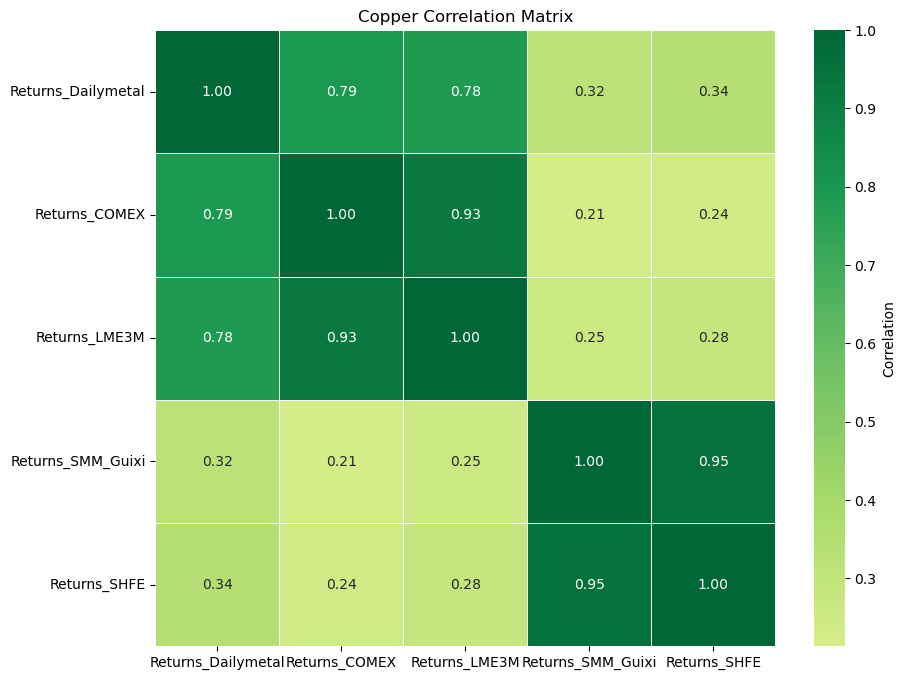

In [94]:
import seaborn as sns

# Calculate the correlation matrix using the returns
dfcu_merged['Returns_Dailymetal'] = dfcu_merged['Price_Dailymetal'].pct_change()
dfcu_merged['Returns_COMEX'] = dfcu_merged['Price_COMEX'].pct_change()
dfcu_merged['Returns_LME3M'] = dfcu_merged['Price_LME_3M'].pct_change()
dfcu_merged['Returns_SMM_Guixi'] = dfcu_merged['Price_SMM_Guixi'].pct_change()
dfcu_merged['Returns_SHFE'] = dfcu_merged['Price_SHFE'].pct_change()

import matplotlib.pyplot as plt

# Drop NaN values
dfcu_merged = dfcu_merged.dropna(subset=['Returns_Dailymetal', 'Returns_COMEX', 'Returns_LME3M', 'Returns_SMM_Guixi', 'Returns_SHFE'])

# Calculate the correlation matrix
correlation_matrix_copper = dfcu_merged[['Returns_Dailymetal', 'Returns_COMEX', 'Returns_LME3M', 'Returns_SMM_Guixi', 'Returns_SHFE']].corr()

# Plot the correlation matrix with a gradient color scale
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper Correlation Matrix")
plt.show()

In [95]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
pairs_copper = [
    ('Price_Dailymetal', 'Price_COMEX'),
    ('Price_Dailymetal', 'Price_LME_3M'),
    ('Price_Dailymetal', 'Price_SMM_Guixi'),
    ('Price_Dailymetal', 'Price_SHFE'),
    ('Price_COMEX', 'Price_LME_3M'),
    ('Price_COMEX', 'Price_SMM_Guixi'),
    ('Price_COMEX', 'Price_SHFE'),
    ('Price_LME_3M', 'Price_SMM_Guixi'),
    ('Price_LME_3M', 'Price_SHFE'),
    ('Price_SMM_Guixi', 'Price_SHFE')
]
# Perform tests and collect results
results_copper = []
for series1, series2 in pairs_copper:
    score, p_value, _ = coint(dfcu_merged[series1], dfcu_merged[series2])
    results_copper.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Copper Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_copper:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Copper Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Dailymetal                        Price_COMEX                             -6.9692        0.0000         
Price_Dailymetal                        Price_LME_3M                            -7.6050        0.0000         
Price_Dailymetal                        Price_SMM_Guixi                         -2.4935        0.2819         
Price_Dailymetal                        Price_SHFE                              -1.8325        0.6138         
Price_COMEX                             Price_LME_3M                            -5.2790        0.0000         
Price_COMEX                             Price_SMM_Guixi                         -1.7744        0.6420         
Price_COMEX                             Price_SHFE                              -1.6769        0.6874         
Price_LME_3M                            Price_SMM_Guixi                      

In [91]:
# Scale the data and plot
dfcu_merged_scaled = dfcu_merged.copy()
dfcu_merged_scaled['Price_Dailymetal'] = (dfcu_merged_scaled['Price_Dailymetal'] - dfcu_merged_scaled['Price_Dailymetal'].mean()) / dfcu_merged_scaled['Price_Dailymetal'].std()
dfcu_merged_scaled['Price_COMEX'] = (dfcu_merged_scaled['Price_COMEX'] - dfcu_merged_scaled['Price_COMEX'].mean()) / dfcu_merged_scaled['Price_COMEX'].std()
dfcu_merged_scaled['Price_LME_3M'] = (dfcu_merged_scaled['Price_LME_3M'] - dfcu_merged_scaled['Price_LME_3M'].mean()) / dfcu_merged_scaled['Price_LME_3M'].std()
dfcu_merged_scaled['Price_SMM_Guixi'] = (dfcu_merged_scaled['Price_SMM_Guixi'] - dfcu_merged_scaled['Price_SMM_Guixi'].mean()) / dfcu_merged_scaled['Price_SMM_Guixi'].std()
dfcu_merged_scaled['Price_SHFE'] = (dfcu_merged_scaled['Price_SHFE'] - dfcu_merged_scaled['Price_SHFE'].mean()) / dfcu_merged_scaled['Price_SHFE'].std()
# Plot the scaled data
fig_copper_scaled = px.line(dfcu_merged_scaled, x='Date', y=['Price_Dailymetal', 'Price_COMEX', 'Price_LME_3M', 'Price_SMM_Guixi', 'Price_SHFE'],
                             labels={'value': 'Scaled Price', 'variable': 'Copper Price'},
                             title='Scaled Copper Prices Over Time')
fig_copper_scaled.update_layout(
    xaxis_title='Date',
    yaxis_title='Scaled Price',
    legend_title_text='Copper Price Sources',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig_copper_scaled.show()